In [ ]:
# Connect with your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Set a Panda Dataframe with the appropriate labels
df = pd.read_csv("/content/drive/MyDrive/IEMOCAP_ANALYSIS(joy-sadness).csv")
df.head(10)

,File,Text,Annotation,Semantic Prediction
0,Ses02M_impro02_F000,I don't want you to go.,sad,joy
1,Ses02M_impro02_M000,"I know, I know. I don't want to go either bab...",sad,joy
2,Ses02M_impro02_F001,I'm going to miss you too; I don't know what ...,sad,joy
3,Ses02M_impro02_F002,I don't want to be a single mom.,sad,sadness
4,Ses02M_impro02_M001,You won't be. I'll be back; I'll be back befo...,sad,sadness
5,Ses02M_impro02_F003,but,sad,sadness
6,Ses02M_impro02_M002,and,sad,sadness
7,Ses02M_impro02_F004,It's dangerous; I mean how can you make sure ...,sad,sadness
8,Ses02M_impro02_M003,"It's- It's dangerous anywhere, honey. I mean ...",fru,sadness
9,Ses02M_impro02_M004,"I'll come back we'll have, you know, some goo...",sad,sadness


In [ ]:
import pandas as pd


# Filter the DataFrame
filtered_df = df[(df['Annotation'].isin(['sad', 'hap'])) & (df['Semantic Prediction'] == 'sadness')]

# Display the first 5 rows of the filtered data
filtered_df.head(12)


,File,Text,Annotation,Semantic Prediction
3,Ses02M_impro02_F002,I don't want to be a single mom.,sad,sadness
4,Ses02M_impro02_M001,You won't be. I'll be back; I'll be back befo...,sad,sadness
5,Ses02M_impro02_F003,but,sad,sadness
6,Ses02M_impro02_M002,and,sad,sadness
7,Ses02M_impro02_F004,It's dangerous; I mean how can you make sure ...,sad,sadness
9,Ses02M_impro02_M004,"I'll come back we'll have, you know, some goo...",sad,sadness
10,Ses02M_impro02_F005,I hope so.,sad,sadness
12,Ses02M_impro02_F006,I hope so.,sad,sadness
14,Ses02M_impro02_F007,It's going to be really rough.,sad,sadness
15,Ses02M_impro02_M007,"You gotta take care of our baby for me, alright?",sad,sadness


In [ ]:
 #Copie your Kaggle API key
!cp /content/drive/MyDrive/Kaggle/kaggle.json /content/

In [ ]:
# Download IEMOCAP
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mouadriali/iemocap-transcriptions-english-french

Dataset URL: https://www.kaggle.com/datasets/mouadriali/iemocap-transcriptions-english-french
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 5.76G/5.78G [01:11<00:00, 187MB/s]
100% 5.78G/5.78G [01:11<00:00, 86.3MB/s]


In [ ]:
!unzip '/content/iemocap-transcriptions-english-french.zip'

Streaming output truncated to the last 5000 lines.
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M016_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M017_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M018_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M019_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M020_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M021_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M022_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M023_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M024_mfcc.png  
  inflating: mfccs_figures-20220508T233533Z-001/mfccs_figures/Ses03M_impro05a_M025_mfcc.png  
  inflati

In [ ]:
!pip install praat-parselmouth
!pip install config
!pip install pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 75.3 MB/s eta 0:00:00


In [ ]:
#Measure pitch of all wav files in directory
import glob
import numpy as np
import pandas as pd
import parselmouth
from parselmouth.praat import call

In [ ]:
# This is the function to measure voice pitch
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    return meanF0, stdevF0, hnr

In [ ]:
import pandas as pd
import parselmouth

# Set a Panda Dataframe with the appropriate labels
df = filtered_df

# Create lists to put the results
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
intensity_list = []
emotion_list = []
annotation_list = []

# Go through all the rows in the DataFrame
for _, row in df.iterrows():
    # Construct the path to the audio file
    audio_name = str(row["File"])  # Assuming filename is in 'File' column
    path = "/content/Iemocap_audio/iemocap_audio/IEMOCAP_wav/"
    audio_file_path = path + audio_name + ".wav"

    # Measure pitch using your function (measurePitch)
    sound = parselmouth.Sound(audio_file_path)
    meanF0, stdevF0, hnr = measurePitch(sound, 75, 500, "Hertz")

    # Get intensity average
    intensity = sound.to_intensity()
    intensity_avg = intensity.get_average()

    # Append values to lists
    file_list.append(audio_file_path)
    mean_F0_list.append(meanF0)
    sd_F0_list.append(stdevF0)
    hnr_list.append(hnr)
    intensity_list.append(intensity_avg)

    # Extract emotion-related information
    emotion_list.append(row['Semantic Prediction'])
    annotation_list.append(row['Annotation'])

# Create a DataFrame with all the collected information
df_features = pd.DataFrame({
    'voiceID': file_list,
    'meanF0Hz': mean_F0_list,
    'stdevF0Hz': sd_F0_list,
    'HNR': hnr_list,
    'IntensityAvg': intensity_list,
    'Semantic Prediction': emotion_list,
    'Acoustic Annotation': annotation_list
})

df_features.head(100)


,voiceID,meanF0Hz,stdevF0Hz,HNR,IntensityAvg,Semantic Prediction,Acoustic Annotation
0,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,271.962490,71.176412,13.938837,55.688040,sadness,sad
1,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,114.124057,12.791295,9.046619,54.701917,sadness,sad
2,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,334.793201,11.368810,6.462038,39.605417,sadness,sad
3,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,97.872301,2.967799,5.894745,49.518632,sadness,sad
4,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,292.018578,50.226213,12.995601,58.669769,sadness,sad
...,...,...,...,...,...,...,...
95,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,192.066363,21.763082,10.569800,49.300993,sadness,hap
96,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,183.170619,14.605062,9.198969,45.792042,sadness,sad
97,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,177.876111,32.835911,7.479061,60.089053,sadness,hap
98,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,181.546569,19.472694,6.619223,45.620178,sadness,hap


In [ ]:
import math
import pandas as pd
import parselmouth

def measurePitch(sound, f0min, f0max, unit):
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max)
    meanF0 = call(pitch, "Get mean", 0, 0, unit)
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit)
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    return meanF0, stdevF0, hnr

def speech_rate(filename):
    silencedb = -25
    mindip = 2
    minpause = 0.3
    sound = parselmouth.Sound(filename)
    originaldur = sound.get_total_duration()
    intensity = sound.to_intensity(50)
    start = call(intensity, "Get time from frame number", 1)
    nframes = call(intensity, "Get number of frames")
    end = call(intensity, "Get time from frame number", nframes)
    min_intensity = call(intensity, "Get minimum", 0, 0, "Parabolic")
    max_intensity = call(intensity, "Get maximum", 0, 0, "Parabolic")

    # get .99 quantile to get maximum (without influence of non-speech sound bursts)
    max_99_intensity = call(intensity, "Get quantile", 0, 0, 0.99)

    # estimate Intensity threshold
    threshold = max_99_intensity + silencedb
    threshold2 = max_intensity - max_99_intensity
    threshold3 = silencedb - threshold2
    if threshold < min_intensity:
        threshold = min_intensity

    # get pauses (silences) and speakingtime
    textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
    silencetier = call(textgrid, "Extract tier", 1)
    silencetable = call(silencetier, "Down to TableOfReal", "sounding")
    npauses = call(silencetable, "Get number of rows")
    speakingtot = 0
    for ipause in range(npauses):
        pause = ipause + 1
        beginsound = call(silencetable, "Get value", pause, 1)
        endsound = call(silencetable, "Get value", pause, 2)
        speakingdur = endsound - beginsound
        speakingtot += speakingdur

    intensity_matrix = call(intensity, "Down to Matrix")
    sound_from_intensity_matrix = call(intensity_matrix, "To Sound (slice)", 1)
    intensity_duration = call(sound_from_intensity_matrix, "Get total duration")
    point_process = call(sound_from_intensity_matrix, "To PointProcess (extrema)", "Left", "yes", "no", "Sinc70")
    numpeaks = call(point_process, "Get number of points")
    t = [call(point_process, "Get time from index", i + 1) for i in range(numpeaks)]

    timepeaks = []
    peakcount = 0
    intensities = []
    for i in range(numpeaks):
        value = call(sound_from_intensity_matrix, "Get value at time", t[i], "Cubic")
        if value > threshold:
            peakcount += 1
            intensities.append(value)
            timepeaks.append(t[i])

    validpeakcount = 0
    currenttime = timepeaks[0]
    currentint = intensities[0]
    validtime = []

    for p in range(peakcount - 1):
        following = p + 1
        followingtime = timepeaks[p + 1]
        dip = call(intensity, "Get minimum", currenttime, timepeaks[p + 1], "None")
        diffint = abs(currentint - dip)
        if diffint > mindip:
            validpeakcount += 1
            validtime.append(timepeaks[p])
        currenttime = timepeaks[following]
        currentint = call(intensity, "Get value at time", timepeaks[following], "Cubic")

    pitch = sound.to_pitch_ac(0.02, 30, 4, False, 0.03, 0.25, 0.01, 0.35, 0.25, 450)
    voicedcount = 0
    voicedpeak = []

    for time in range(validpeakcount):
        querytime = validtime[time]
        whichinterval = call(textgrid, "Get interval at time", 1, querytime)
        whichlabel = call(textgrid, "Get label of interval", 1, whichinterval)
        value = pitch.get_value_at_time(querytime)
        if not math.isnan(value):
            if whichlabel == "sounding":
                voicedcount += 1
                voicedpeak.append(validtime[time])

    timecorrection = originaldur / intensity_duration

    speakingrate = voicedcount / originaldur
    articulationrate = voicedcount / speakingtot
    npause = npauses - 1
    asd = speakingtot / voicedcount
    speechrate_dictionary = {'soundname':filename,
                             'nsyll':voicedcount,
                             'npause': npause,
                             'dur(s)':originaldur,
                             'phonationtime(s)':intensity_duration,
                             'speechrate(nsyll / dur)': speakingrate,
                             "articulation rate(nsyll / phonationtime)":articulationrate,
                             "ASD(speakingtime / nsyll)":asd}
    return speechrate_dictionary

# Set a Panda Dataframe with the appropriate labels
df = filtered_df

# Create lists to put the results
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
intensity_list = []
emotion_list = []
annotation_list = []
speech_rate_list = []  # List to hold speech rates
articulation_rate_list = []  # List to hold articulation rates
avg_syllable_duration_list = []  # List to hold average syllable duration

# Go through all the rows in the DataFrame
for _, row in df.iterrows():
    audio_name = str(row["File"])
    path = "/content/Iemocap_audio/iemocap_audio/IEMOCAP_wav/"
    audio_file_path = path + audio_name + ".wav"

    # Measure pitch using your function (measurePitch)
    sound = parselmouth.Sound(audio_file_path)
    meanF0, stdevF0, hnr = measurePitch(sound, 75, 500, "Hertz")

    # Get intensity average
    intensity = sound.to_intensity()
    intensity_avg = intensity.get_average()

    # Calculate speech rate
    speech_rate_dict = speech_rate(audio_file_path)
    speech_rate_val = speech_rate_dict['speechrate(nsyll / dur)']

    # Extract articulation rate and average syllable duration from speech rate dictionary
    articulation_rate_val = speech_rate_dict["articulation rate(nsyll / phonationtime)"]
    avg_syllable_duration_val = speech_rate_dict["ASD(speakingtime / nsyll)"]

    # Append values to lists
    file_list.append(audio_file_path)
    mean_F0_list.append(meanF0)
    sd_F0_list.append(stdevF0)
    hnr_list.append(hnr)
    intensity_list.append(intensity_avg)
    emotion_list.append(row['Semantic Prediction'])
    annotation_list.append(row['Annotation'])
    speech_rate_list.append(speech_rate_val)
    articulation_rate_list.append(articulation_rate_val)
    avg_syllable_duration_list.append(avg_syllable_duration_val)

# Create a DataFrame with all the collected information
df_features = pd.DataFrame({
    'voiceID': file_list,
    'meanF0Hz': mean_F0_list,
    'stdevF0Hz': sd_F0_list,
    'HNR': hnr_list,
    'IntensityAvg': intensity_list,
    'SpeechRate': speech_rate_list,
    'ArticulationRate': articulation_rate_list,
    'AvgSyllableDuration': avg_syllable_duration_list,
    'Semantic Prediction': emotion_list,
    'Acoustic Annotation': annotation_list
})

df_features.head(100)


<ipython-input-14-18b57b7c9a9a>:37: PraatWarning: The loudest and softest part in your sound differ by only 7.369420634311634 dB.
  textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
<ipython-input-14-18b57b7c9a9a>:37: PraatWarning: The loudest and softest part in your sound differ by only 6.642153480666419 dB.
  textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
<ipython-input-14-18b57b7c9a9a>:37: PraatWarning: The loudest and softest part in your sound differ by only 5.517172896145887 dB.
  textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
<ipython-input-14-18b57b7c9a9a>:37: PraatWarning: The loudest and softest part in your sound differ by only 9.505166509969243 dB.
  textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
<ipython-input-14-18b57b7c9a9a>:37: PraatWarning: The loudest an

,voiceID,meanF0Hz,stdevF0Hz,HNR,IntensityAvg,SpeechRate,ArticulationRate,AvgSyllableDuration,Semantic Prediction,Acoustic Annotation
0,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,271.962490,71.176412,13.938837,55.688040,2.820812,4.629630,0.216000,sadness,sad
1,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,114.124057,12.791295,9.046619,54.701917,3.429383,3.429383,0.291598,sadness,sad
2,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,334.793201,11.368810,6.462038,39.605417,2.997939,2.997939,0.333562,sadness,sad
3,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,97.872301,2.967799,5.894745,49.518632,2.049574,2.049574,0.487906,sadness,sad
4,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,292.018578,50.226213,12.995601,58.669769,3.106042,4.161293,0.240310,sadness,sad
...,...,...,...,...,...,...,...,...,...,...
95,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,192.066363,21.763082,10.569800,49.300993,4.560261,4.560261,0.219286,sadness,hap
96,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,183.170619,14.605062,9.198969,45.792042,3.745318,3.745318,0.267000,sadness,sad
97,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,177.876111,32.835911,7.479061,60.089053,2.580645,5.952381,0.168000,sadness,hap
98,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,181.546569,19.472694,6.619223,45.620178,3.268107,3.268107,0.305987,sadness,hap


In [ ]:
# Define a function to create the tag
def create_tag(row):
    if row['Semantic Prediction'] == 'sadness' and row['Acoustic Annotation'] == 'sad':
        return 'Sincere'
    elif row['Semantic Prediction'] == 'sadness' and row['Acoustic Annotation'] == 'hap':
        return 'Kind Irony'
    else:
        return 'Other'

# Apply the function to create the tag column
df_features['Tag'] = df_features.apply(create_tag, axis=1)

# Print the updated DataFrame
df_features.head(100)

,voiceID,meanF0Hz,stdevF0Hz,HNR,IntensityAvg,SpeechRate,ArticulationRate,AvgSyllableDuration,Semantic Prediction,Acoustic Annotation,Tag
0,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,271.962490,71.176412,13.938837,55.688040,2.820812,4.629630,0.216000,sadness,sad,Sincere
1,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,114.124057,12.791295,9.046619,54.701917,3.429383,3.429383,0.291598,sadness,sad,Sincere
2,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,334.793201,11.368810,6.462038,39.605417,2.997939,2.997939,0.333562,sadness,sad,Sincere
3,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,97.872301,2.967799,5.894745,49.518632,2.049574,2.049574,0.487906,sadness,sad,Sincere
4,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,292.018578,50.226213,12.995601,58.669769,3.106042,4.161293,0.240310,sadness,sad,Sincere
...,...,...,...,...,...,...,...,...,...,...,...
95,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,192.066363,21.763082,10.569800,49.300993,4.560261,4.560261,0.219286,sadness,hap,Kind Irony
96,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,183.170619,14.605062,9.198969,45.792042,3.745318,3.745318,0.267000,sadness,sad,Sincere
97,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,177.876111,32.835911,7.479061,60.089053,2.580645,5.952381,0.168000,sadness,hap,Kind Irony
98,/content/Iemocap_audio/iemocap_audio/IEMOCAP_w...,181.546569,19.472694,6.619223,45.620178,3.268107,3.268107,0.305987,sadness,hap,Kind Irony


In [ ]:
print (df_features)
df_features.to_csv("features_Kind_Irony_vs_Sincere.csv", index=False)


                                                voiceID    meanF0Hz  \
0     /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  271.962490   
1     /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  114.124057   
2     /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  334.793201   
3     /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...   97.872301   
4     /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  292.018578   
...                                                 ...         ...   
1351  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  207.410710   
1352  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  117.877852   
1353  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  135.771280   
1354  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  130.826948   
1355  /content/Iemocap_audio/iemocap_audio/IEMOCAP_w...  185.792453   

      stdevF0Hz        HNR  IntensityAvg  SpeechRate  ArticulationRate  \
0     71.176412  13.938837     55.688040    2.820812          4.629630   

In [ ]:
# Count the number of occurrences of each tag
tag_counts = df_features['Tag'].value_counts()

# Print the counts
print("Sincere:", tag_counts.get('Sincere', 0))
print("Kind Irony:", tag_counts.get('Kind Irony', 0))

Sincere: 793
Kind Irony: 563


In [ ]:
import pandas as pd

# Assuming 'df_features' is your DataFrame and 'Tag' is the column containing 'Sincere' and 'Kind Irony'
# Remove any rows with NaN values
df_features = df_features.dropna()

# Get the counts of each tag
tag_counts = df_features['Tag'].value_counts()

# Set min_size to the smaller of the two counts for balancing
min_size = min(tag_counts.get('Sincere', 0), tag_counts.get('Kind Irony', 0))

# Check if there are enough entries to sample min_size rows
if min_size > 0:
    # Randomly sample min_size entries from each tag
    df_sincere = df_features[df_features['Tag'] == 'Sincere'].sample(n=min_size, random_state=42)
    df_kind_irony = df_features[df_features['Tag'] == 'Kind Irony'].sample(n=min_size, random_state=42)

    # Combine the two balanced samples into a new DataFrame
    df_balanced = pd.concat([df_sincere, df_kind_irony])

    # Verify the counts to ensure equal size
    print(df_balanced['Tag'].value_counts())
else:
    print("Not enough data to balance both tags.")


Tag
Sincere       561
Kind Irony    561
Name: count, dtype: int64


In [ ]:
# Filter for female and male entries
female_entries = df_balanced[df_balanced['voiceID'].str.contains(r'F\d{3}')]
male_entries = df_balanced[df_balanced['voiceID'].str.contains(r'M\d{3}')]

# Calculate statistics grouped by 'Tag' for female entries
statistics_female_by_tag = female_entries.groupby('Tag')[['meanF0Hz', 'stdevF0Hz', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']].describe()
statistics_female_by_tag.to_csv("statistics_female_by_tag_Kind_Irony_vs_Sincere.csv")

# Calculate statistics grouped by 'Tag' for male entries
statistics_male_by_tag = male_entries.groupby('Tag')[['meanF0Hz', 'stdevF0Hz', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']].describe()
statistics_male_by_tag.to_csv("statistics_male_by_tag_Kind_Irony_vs_Sincere.csv")

# Print the statistics
print("Female Entries Statistics:")
print(statistics_female_by_tag)
print("\nMale Entries Statistics:")
print(statistics_male_by_tag)

Female Entries Statistics:
           meanF0Hz                                                 \
              count        mean        std         min         25%   
Tag                                                                  
Kind Irony    302.0  225.000150  42.969398   84.082143  193.117481   
Sincere       299.0  226.599967  42.513852  129.093043  198.108779   

                                               stdevF0Hz             ...  \
                   50%         75%         max     count       mean  ...   
Tag                                                                  ...   
Kind Irony  220.735691  249.742676  385.796982     302.0  58.992735  ...   
Sincere     221.690507  249.759561  456.570893     299.0  47.033222  ...   

           ArticulationRate           AvgSyllableDuration                      \
                        75%       max               count      mean       std   
Tag                                                                            

In [ ]:
# Group the DataFrame by 'Tag' and describe the statistics for the specified columns
#statistics_by_tag = df_features.groupby('Tag')[['meanF0Hz', 'stdevF0Hz', 'IntensityAvg', 'SpeechRate']].describe()
statistics_by_tag = df_balanced.groupby('Tag')[['meanF0Hz', 'stdevF0Hz', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']].describe()
statistics_by_tag.to_csv("statistics_by_tag_Combined_Kind_Irony_vs_Sincere.csv")
# Print the statistics
print(statistics_by_tag)

           meanF0Hz                                                            \
              count        mean        std        min         25%         50%   
Tag                                                                             
Kind Irony    561.0  193.166522  54.875436  77.598564  151.259330  192.274503   
Sincere       561.0  181.370062  64.853048  79.783727  121.615074  183.532819   

                                   stdevF0Hz             ... ArticulationRate  \
                   75%         max     count       mean  ...              75%   
Tag                                                      ...                    
Kind Irony  228.778114  385.796982     561.0  57.030344  ...         4.542275   
Sincere     224.461197  468.904623     561.0  42.532416  ...         4.363739   

                     AvgSyllableDuration                                \
                 max               count      mean       std       min   
Tag                                     

In [ ]:
# Check for missing values in relevant columns
missing_counts = df_balanced[['meanF0Hz', 'stdevF0Hz', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']].isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 meanF0Hz               0
stdevF0Hz              0
IntensityAvg           0
SpeechRate             0
ArticulationRate       0
AvgSyllableDuration    0
dtype: int64


In [ ]:
from scipy import stats
import pandas as pd

# Create empty lists to store results for each gender
shapiro_pair_results_female = []
levene_pair_results_female = []
significance_pair_results_female = []
shapiro_pair_results_male = []
levene_pair_results_male = []
significance_pair_results_male = []

# Define features to test
features = ['meanF0Hz', 'stdevF0Hz', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']

# Separate entries by gender
female_entries = df_balanced[df_balanced['voiceID'].str.contains(r'F\d{3}')]
male_entries = df_balanced[df_balanced['voiceID'].str.contains(r'M\d{3}')]

# Function to perform tests and store results
def perform_tests(data_a, data_b, gender_label):
    shapiro_results = []
    levene_results = []
    significance_results = []

    for feature in features:
        # Shapiro-Wilk test for normality
        w_statistic_a, p_value_a = stats.shapiro(data_a[feature])
        is_normal_a = p_value_a > 0.05
        w_statistic_b, p_value_b = stats.shapiro(data_b[feature])
        is_normal_b = p_value_b > 0.05

        shapiro_results.append({
            'Gender': gender_label,
            'Feature': feature,
            'Mood A': 'Kind Irony',
            'W-statistic A': w_statistic_a,
            'P-value A': p_value_a,
            'Normal Distribution A': is_normal_a,
            'Mood B': 'Sarcasm',
            'W-statistic B': w_statistic_b,
            'P-value B': p_value_b,
            'Normal Distribution B': is_normal_b
        })

        # Levene's test for equal variance
        levene_stat, p_value = stats.levene(data_a[feature], data_b[feature])
        is_equal_variance = p_value > 0.05
        levene_results.append({
            'Gender': gender_label,
            'Feature': feature,
            'Levene-statistic': levene_stat,
            'P-value': p_value,
            'Equal Variance': is_equal_variance
        })

        # Perform appropriate test based on normality and equal variance
        if is_normal_a and is_normal_b:  # If data is normally distributed
            t_statistic, p_value = stats.ttest_ind(data_a[feature], data_b[feature], equal_var=is_equal_variance)
            test_name = 'Student t-test' if is_equal_variance else 'Welch t-Test'
        else:  # If data is not normally distributed
            t_statistic, p_value = stats.mannwhitneyu(data_a[feature], data_b[feature])
            test_name = 'Mann-Whitney U-test'

        is_significant = p_value < 0.05
        significance_results.append({
            'Gender': gender_label,
            'Feature': feature,
            'Test': test_name,
            'Statistic': t_statistic,
            'P-value': p_value,
            'Significant': is_significant
        })

    return shapiro_results, levene_results, significance_results

# Perform tests for female entries
female_kind_irony = female_entries[female_entries['Tag'] == 'Kind Irony']
female_sarcasm = female_entries[female_entries['Tag'] == 'Sincere']
results_female = perform_tests(female_kind_irony, female_sarcasm, 'Female')
shapiro_pair_results_female, levene_pair_results_female, significance_pair_results_female = results_female

# Perform tests for male entries
male_kind_irony = male_entries[male_entries['Tag'] == 'Kind Irony']
male_sarcasm = male_entries[male_entries['Tag'] == 'Sincere']
results_male = perform_tests(male_kind_irony, male_sarcasm, 'Male')
shapiro_pair_results_male, levene_pair_results_male, significance_pair_results_male = results_male

# Combine results into a single DataFrame
df_shapiro = pd.DataFrame(shapiro_pair_results_female + shapiro_pair_results_male)
df_levene = pd.DataFrame(levene_pair_results_female + levene_pair_results_male)
df_significance_Male_Female = pd.DataFrame(significance_pair_results_female + significance_pair_results_male)

# Merge DataFrames into one
df_combined = pd.concat([df_shapiro, df_levene[['Levene-statistic', 'P-value', 'Equal Variance']], df_significance_Male_Female[['Test', 'Statistic', 'P-value', 'Significant']]], axis=1)

# Save the combined results to a single CSV file
df_combined.to_csv("statistical_tests_results_combined_Kind_Irony_vs_Sincere.csv", index=False)

# Print or use DataFrame as required
print("Combined Statistical Tests Results:")
print(df_combined)


Combined Statistical Tests Results:
    Gender              Feature      Mood A  W-statistic A     P-value A  \
0   Female             meanF0Hz  Kind Irony       0.974184  2.950410e-05   
1   Female            stdevF0Hz  Kind Irony       0.981726  6.742296e-04   
2   Female         IntensityAvg  Kind Irony       0.997549  9.347123e-01   
3   Female           SpeechRate  Kind Irony       0.988893  2.086106e-02   
4   Female     ArticulationRate  Kind Irony       0.987699  1.141844e-02   
5   Female  AvgSyllableDuration  Kind Irony       0.635749  7.141606e-25   
6     Male             meanF0Hz  Kind Irony       0.939300  7.433889e-09   
7     Male            stdevF0Hz  Kind Irony       0.955771  4.211351e-07   
8     Male         IntensityAvg  Kind Irony       0.973282  8.821761e-05   
9     Male           SpeechRate  Kind Irony       0.996444  8.288486e-01   
10    Male     ArticulationRate  Kind Irony       0.989968  7.111246e-02   
11    Male  AvgSyllableDuration  Kind Irony       0.

In [ ]:
df_significance_Male_Female

,Gender,Feature,Test,Statistic,P-value,Significant
0,Female,meanF0Hz,Mann-Whitney U-test,43955.000000,5.749623e-01,False
1,Female,stdevF0Hz,Mann-Whitney U-test,56632.000000,6.853153e-08,True
2,Female,IntensityAvg,Student t-test,10.527750,6.767463e-24,True
3,Female,SpeechRate,Mann-Whitney U-test,52008.500000,1.270071e-03,True
4,Female,ArticulationRate,Mann-Whitney U-test,49307.000000,5.077515e-02,False
5,Female,AvgSyllableDuration,Mann-Whitney U-test,40991.500000,5.080298e-02,False
6,Male,meanF0Hz,Mann-Whitney U-test,49051.000000,1.351696e-18,True
7,Male,stdevF0Hz,Mann-Whitney U-test,46208.000000,8.894631e-13,True
8,Male,IntensityAvg,Mann-Whitney U-test,50919.000000,4.664390e-23,True
9,Male,SpeechRate,Student t-test,2.682643,7.537229e-03,True


In [ ]:
from scipy import stats

# Create empty lists to store results
shapiro_pair_results = []
levene_pair_results = []
significance_pair_results = []

# Perform statistical tests for each feature
for feature in ['meanF0Hz', 'stdevF0Hz', 'IntensityAvg', 'SpeechRate', 'ArticulationRate', 'AvgSyllableDuration']:
    data_feature_a = df_balanced[df_balanced['Tag'] == 'Sincere'][feature]
    data_feature_b = df_balanced[df_balanced['Tag'] == 'Kind Irony'][feature]

    # Shapiro-Wilk test for normality for Group A
    w_statistic_a, p_value_a = stats.shapiro(data_feature_a)
    is_normal_a = p_value_a > 0.05

    # Shapiro-Wilk test for normality for Group B
    w_statistic_b, p_value_b = stats.shapiro(data_feature_b)
    is_normal_b = p_value_b > 0.05

    # Append Shapiro-Wilk test results
    shapiro_pair_results.append({
        'Feature': feature,
        'Mood A': 'Sincere',
        'W-statistic A': w_statistic_a,
        'P-value A': p_value_a,
        'Normal Distribution A': is_normal_a,
        'Mood B': 'Kind Irony',
        'W-statistic B': w_statistic_b,
        'P-value B': p_value_b,
        'Normal Distribution B': is_normal_b
    })

    # Levene's test for equal variance
    levene_stat, p_value = stats.levene(data_feature_a, data_feature_b)
    is_equal_variance = p_value > 0.05
    levene_pair_results.append({
        'Feature': feature,
        'Levene-statistic': levene_stat,
        'P-value': p_value,
        'Equal Variance': is_equal_variance
    })

    # Perform appropriate test based on normality and equal variance
    if is_normal_a and is_normal_b:  # If data is normally distributed
        t_statistic, p_value = stats.ttest_ind(data_feature_a, data_feature_b, equal_var=is_equal_variance)
        is_significant = p_value < 0.05
        significance_pair_results.append({
            'Feature': feature,
            'Test': 'Student t-test' if is_equal_variance else 'Welch t-Test',
            'Statistic': t_statistic,
            'P-value': p_value,
            'Significant': is_significant
        })
    else:  # If data is not normally distributed
        mann_whitney_u_statistic, p_value = stats.mannwhitneyu(data_feature_a, data_feature_b)
        is_significant = p_value < 0.05
        significance_pair_results.append({
            'Feature': feature,
            'Test': 'Mann-Whitney U-test',
            'Statistic': mann_whitney_u_statistic,
            'P-value': p_value,
            'Significant': is_significant
        })

# Convert lists to DataFrames
df_shapiro = pd.DataFrame(shapiro_pair_results)
df_levene = pd.DataFrame(levene_pair_results)
df_significance = pd.DataFrame(significance_pair_results)


# Merge DataFrames into one
df_combined_general = pd.concat([df_shapiro, df_levene[['Levene-statistic', 'P-value', 'Equal Variance']], df_significance[['Test', 'Statistic', 'P-value', 'Significant']]], axis=1)

# Save the combined results to a single CSV file
df_combined_general.to_csv("statistical_tests_results_combined_GENERAL_Kind_Irony_vs_Sincere.csv", index=False)

# Print or use DataFrame as required
print("Combined Statistical Tests Results:")
print(df_combined_general)



Combined Statistical Tests Results:
               Feature   Mood A  W-statistic A     P-value A  \
0             meanF0Hz  Sincere       0.942846  7.125431e-14   
1            stdevF0Hz  Sincere       0.948745  4.991233e-13   
2         IntensityAvg  Sincere       0.995916  1.542610e-01   
3           SpeechRate  Sincere       0.997431  5.404641e-01   
4     ArticulationRate  Sincere       0.997206  4.597510e-01   
5  AvgSyllableDuration  Sincere       0.746811  2.128814e-28   

   Normal Distribution A      Mood B  W-statistic B     P-value B  \
0                  False  Kind Irony       0.986065  3.391302e-05   
1                  False  Kind Irony       0.973528  1.562646e-08   
2                   True  Kind Irony       0.993792  2.116367e-02   
3                   True  Kind Irony       0.993878  2.293956e-02   
4                   True  Kind Irony       0.991365  2.345298e-03   
5                  False  Kind Irony       0.671569  1.651271e-31   

   Normal Distribution B  Leven

In [ ]:
df_significance

,Feature,Test,Statistic,P-value,Significant
0,meanF0Hz,Mann-Whitney U-test,137166.0,1.984316e-04,True
1,stdevF0Hz,Mann-Whitney U-test,111206.0,1.824278e-17,True
2,IntensityAvg,Mann-Whitney U-test,83066.0,1.171084e-42,True
3,SpeechRate,Mann-Whitney U-test,134349.5,2.235381e-05,True
4,ArticulationRate,Mann-Whitney U-test,138657.0,5.683839e-04,True
5,AvgSyllableDuration,Mann-Whitney U-test,176064.0,5.683840e-04,True


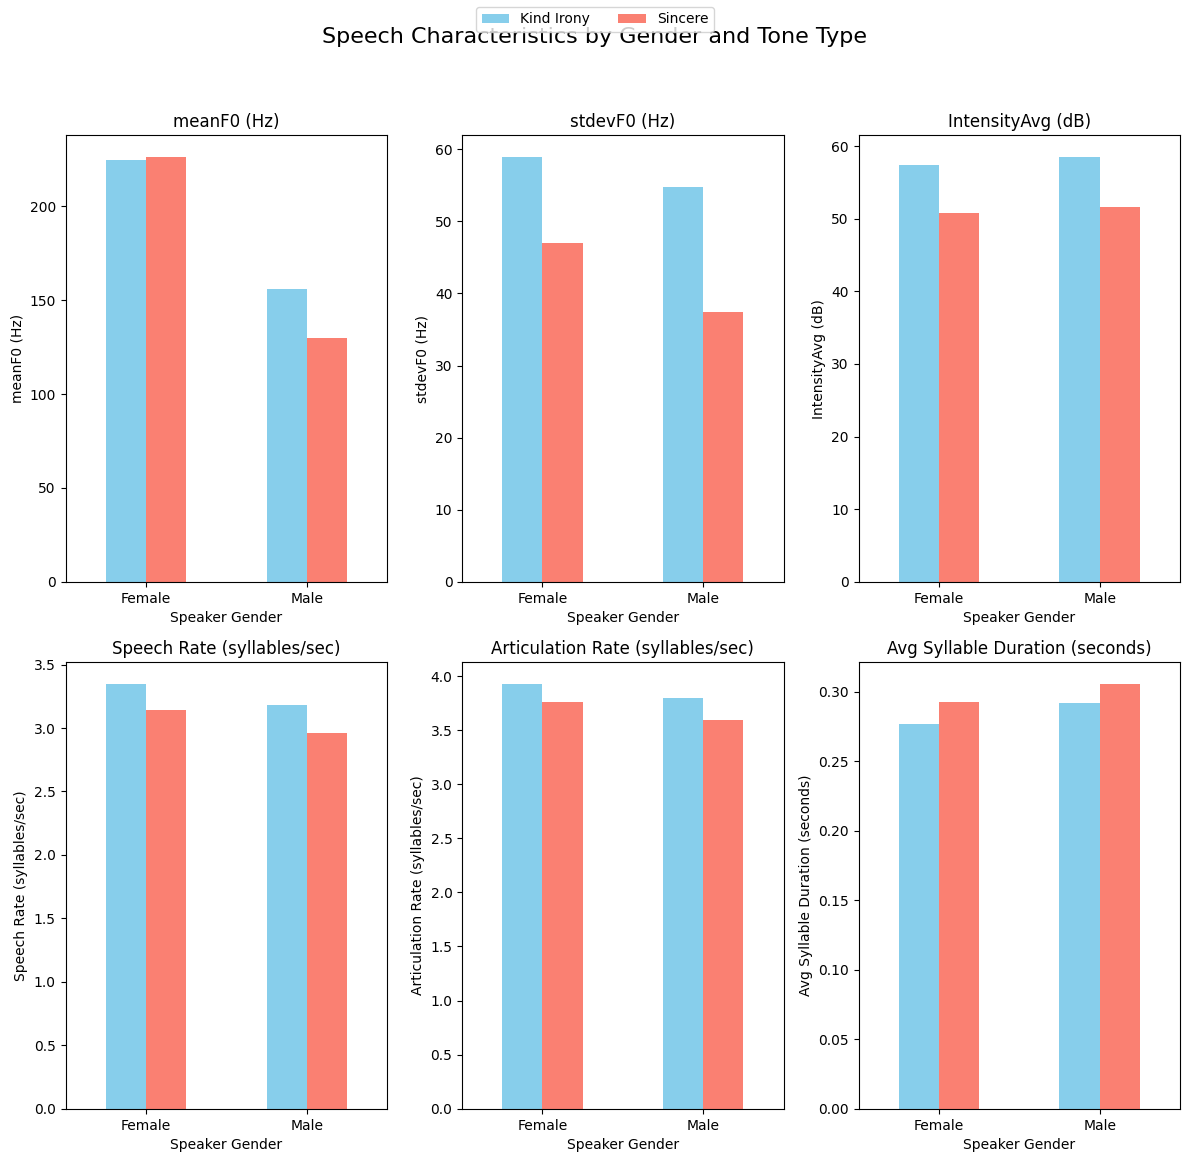

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with the provided data
data = {
    'Speaker Gender': ['Male', 'Male', 'Female', 'Female'],
    'Tone Type': ['Sincere', 'Kind Irony', 'Sincere', 'Kind Irony'],
    'meanF0 (Hz)': [129.75, 156.05, 226.6, 225.0],
    'stdevF0 (Hz)': [37.4, 54.74, 47.03, 58.99],
    'IntensityAvg (dB)': [51.62, 58.55, 50.79, 57.41],
    'Speech Rate (syllables/sec)': [2.96, 3.18, 3.14, 3.35],
    'Articulation Rate (syllables/sec)': [3.59, 3.80, 3.76, 3.93],
    'Avg Syllable Duration (seconds)': [0.306, 0.292, 0.293, 0.277]
}

df = pd.DataFrame(data)

# Set the tone type as the index for easier plotting
df.set_index(['Speaker Gender', 'Tone Type'], inplace=True)

# Plotting with increased height
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))  # Increased height from 12 to 18
fig.suptitle('Speech Characteristics by Gender and Tone Type', fontsize=16)

# Plot each speech characteristic
columns_to_plot = [
    'meanF0 (Hz)',
    'stdevF0 (Hz)',
    'IntensityAvg (dB)',
    'Speech Rate (syllables/sec)',
    'Articulation Rate (syllables/sec)',
    'Avg Syllable Duration (seconds)'
]

# Add a variable for tone colors
colors = ['skyblue', 'salmon']

# Plot the data without individual legends
for ax, column in zip(axes.flatten(), columns_to_plot):
    df[column].unstack().plot(kind='bar', ax=ax, yerr=df[column].apply(lambda x: np.std(x)), capsize=5, color=colors, legend=False)
    ax.set_title(column)
    ax.set_ylabel(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add a single legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


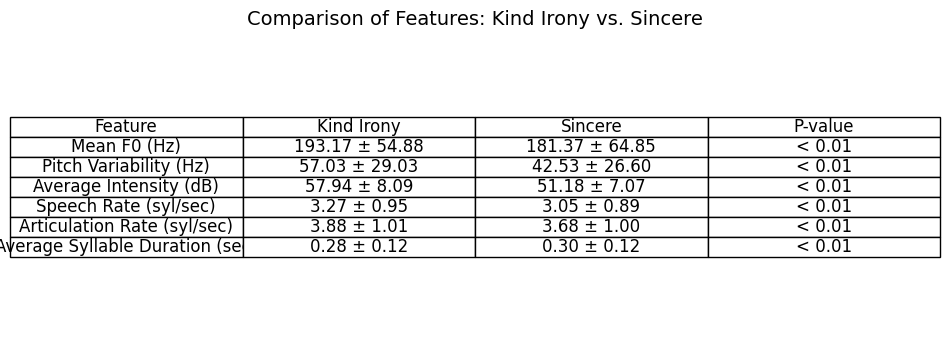

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the original data
data = {
    'Feature': [
        'Mean F0 (Hz)',
        'Pitch Variability (Hz)',
        'Average Intensity (dB)',
        'Speech Rate (syl/sec)',
        'Articulation Rate (syl/sec)',
        'Average Syllable Duration (sec)'
    ],
    'Kind Irony': [
        '193.17 ± 54.88',
        '57.03 ± 29.03',
        '57.94 ± 8.09',
        '3.27 ± 0.95',
        '3.88 ± 1.01',
        '0.28 ± 0.12'
    ],
    'Sincere': [
        '181.37 ± 64.85',
        '42.53 ± 26.60',
        '51.18 ± 7.07',
        '3.05 ± 0.89',
        '3.68 ± 1.00',
        '0.30 ± 0.12'
    ]
}

# Create a DataFrame for p-values
p_values = {
    'Feature': [
        'Mean F0 (Hz)',
        'Pitch Variability (Hz)',
        'Average Intensity (dB)',
        'Speech Rate (syl/sec)',
        'Articulation Rate (syl/sec)',
        'Average Syllable Duration (sec)'
    ],
    'P-value': [
        1.984316e-04,
        1.824278e-17,
        1.171084e-42,
        2.235381e-05,
        5.683839e-04,
        5.683840e-04
    ]
}

# Convert both dictionaries to DataFrames
df = pd.DataFrame(data)
df_p_values = pd.DataFrame(p_values)

# Format p-values: '< 0.01' for values < 0.01 and keep as is for others
df_p_values['P-value'] = df_p_values['P-value'].apply(lambda x: '< 0.01' if x < 0.01 else f'{x:.2e}')

# Merge DataFrames to combine features with formatted p-values
merged_df = pd.merge(df, df_p_values, on='Feature')

# Create the table
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
table_data = merged_df.values
table = ax.table(cellText=table_data, colLabels=merged_df.columns, cellLoc='center', loc='center')

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the scale for better visibility

# Display the table
plt.title('Comparison of Features: Kind Irony vs. Sincere', fontsize=14)
plt.show()


Statistical Description for Intensity Avg:
           IntensityAvg                                                        \
                  count       mean       std        min        25%        50%   
Tag                                                                             
Kind Irony        561.0  57.936807  8.085566  35.870106  52.401708  58.334759   
Sincere           561.0  51.179506  7.072381  33.680866  46.111121  50.977492   

                                  
                  75%        max  
Tag                               
Kind Irony  63.543932  82.505890  
Sincere     56.097400  73.655281  


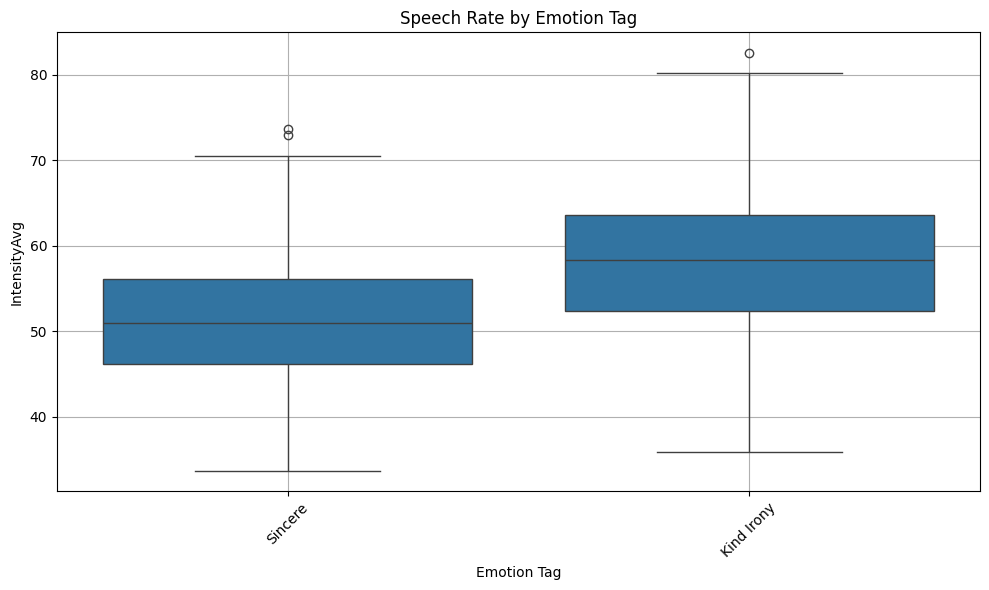

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the DataFrame by 'Tag' and describe the statistics for the specified columns
statistics_by_tag = df_balanced.groupby('Tag')[['IntensityAvg']].describe()

# Print the statistical description for IntensityAvg
print("Statistical Description for Intensity Avg:")
print(statistics_by_tag)

# Plot statistics for speech rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_balanced, x='Tag', y='IntensityAvg')
plt.title('Speech Rate by Emotion Tag')
plt.xlabel('Emotion Tag')
plt.ylabel('IntensityAvg')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import shapiro, ttest_rel, mannwhitneyu, levene

# Create an empty list to store results
results = []

# Perform Shapiro-Wilk test and paired t-test or Mann-Whitney U-test for each column
for column in ['meanF0Hz', 'stdevF0Hz', 'IntensityAvg', 'SpeechRate']:
    # Extract data for Sincere and irony groups
    data_sincere = df_balanced[df_balanced['Tag'] == 'Sincere'][column]
    data_irony = df_balanced[df_balanced['Tag'] == 'Kind Irony'][column]

    # Shapiro-Wilk test for normality
    _, p_value_shapiro_sincere = shapiro(data_sincere)
    _, p_value_shapiro_irony = shapiro(data_irony)

    # Check for equal variance
    _, p_value_levene = levene(data_sincere, data_irony)

    # Perform tests based on normality and equal variance assumptions
    if p_value_shapiro_sincere < 0.05 or p_value_shapiro_irony < 0.05 or p_value_levene < 0.05:
        # Perform Mann-Whitney U-test if equal variance assumption is violated
        stat, p_value_mannwhitneyu = mannwhitneyu(data_sincere, data_irony)
        results.append((column, 'Mann-Whitney U-test', stat, p_value_mannwhitneyu))
    else:
        # Perform paired t-test
        paired_ttest_result = ttest_rel(data_sincere, data_irony)
        results.append((column, 'Paired t-test', paired_ttest_result.statistic, paired_ttest_result.pvalue))

# Create DataFrame from results
df_results = pd.DataFrame(results, columns=['Feature', 'Test', 'Statistic', 'P-value'])

# Print DataFrame
print(df_results)

        Feature                 Test  Statistic       P-value
0      meanF0Hz  Mann-Whitney U-test   137166.0  1.984316e-04
1     stdevF0Hz  Mann-Whitney U-test   111206.0  1.824278e-17
2  IntensityAvg  Mann-Whitney U-test    83066.0  1.171084e-42
3    SpeechRate  Mann-Whitney U-test   134349.5  2.235381e-05


In [ ]:
from scipy.stats import shapiro, ttest_rel

# Create an empty dictionary to store results
results = {}

# Perform Shapiro-Wilk test and paired t-test for each column
for column in ['meanF0Hz', 'stdevF0Hz', 'HNR', 'IntensityAvg', 'SpeechRate']:
    for tag in ['Sincere', 'Kind Irony']:
        data = df_balanced[df_balanced['Tag'] == tag][column]

        # Shapiro-Wilk test for normality
        _, p_value_shapiro = shapiro(data)

        if p_value_shapiro < 0.05:  # Data is not normally distributed
            results[(tag, column)] = ('Non-Normal', None)
        else:  # Data is normally distributed
            paired_ttest_result = ttest_rel(
                df_balanced[df_balanced['Tag'] == 'Sincere'][column],
                df_balanced[df_balanced['Tag'] == 'Kind Irony'][column]
            )
            results[(tag, column)] = ('Normal', paired_ttest_result)

# Print results
for key, value in results.items():
    print(f"Tag: {key[0]}, Column: {key[1]}")
    print("Distribution:", value[0])
    if value[1]:  # If there's a paired t-test result available
        print("Paired t-test Result:", value[1])
    print()

Tag: Sincere, Column: meanF0Hz
Distribution: Non-Normal

Tag: Kind Irony, Column: meanF0Hz
Distribution: Non-Normal

Tag: Sincere, Column: stdevF0Hz
Distribution: Non-Normal

Tag: Kind Irony, Column: stdevF0Hz
Distribution: Non-Normal

Tag: Sincere, Column: HNR
Distribution: Non-Normal

Tag: Kind Irony, Column: HNR
Distribution: Non-Normal

Tag: Sincere, Column: IntensityAvg
Distribution: Normal
Paired t-test Result: TtestResult(statistic=-14.357716038126874, pvalue=4.970271350687715e-40, df=560)

Tag: Kind Irony, Column: IntensityAvg
Distribution: Non-Normal

Tag: Sincere, Column: SpeechRate
Distribution: Normal
Paired t-test Result: TtestResult(statistic=-3.925641842621432, pvalue=9.727377320821656e-05, df=560)

Tag: Kind Irony, Column: SpeechRate
Distribution: Non-Normal



Mann-Whitney U-test results:
Column: meanF0Hz
U-statistic: 137166.0
P-value: 0.0001984316304690629

Column: stdevF0Hz
U-statistic: 111206.0
P-value: 1.8242780173048004e-17

Column: HNR
U-statistic: 138428.0
P-value: 0.00048580228080918756

Column: IntensityAvg
U-statistic: 83066.0
P-value: 1.1710836261479785e-42

Column: SpeechRate
U-statistic: 134349.5
P-value: 2.2353805885655342e-05



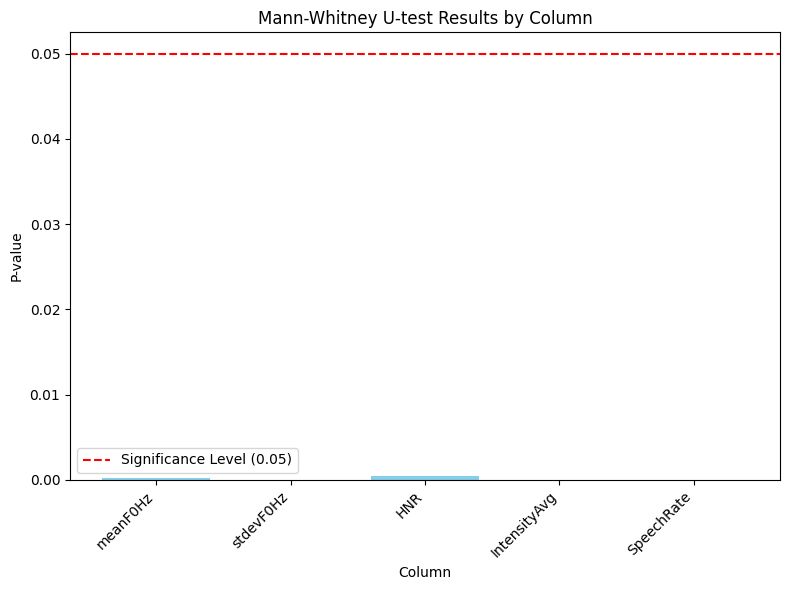

In [ ]:
from scipy.stats import mannwhitneyu

# Create an empty dictionary to store results
results_mannwhitneyu = {}

# Perform Mann-Whitney U-test for each column
for column in ['meanF0Hz', 'stdevF0Hz', 'HNR', 'IntensityAvg', 'SpeechRate']:
    data_sincere = df_balanced[df_balanced['Tag'] == 'Sincere'][column]
    data_irony = df_balanced[df_balanced['Tag'] == 'Kind Irony'][column]

    # Mann-Whitney U-test
    stat, p_value_mannwhitneyu = mannwhitneyu(data_sincere, data_irony)

    results_mannwhitneyu[column] = (stat, p_value_mannwhitneyu)

# Print results
print("Mann-Whitney U-test results:")
for column, (statistic, p_value) in results_mannwhitneyu.items():
    print(f"Column: {column}")
    print(f"U-statistic: {statistic}")
    print(f"P-value: {p_value}")
    print()

# Plot results
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(results_mannwhitneyu)), [p_value for statistic, p_value in results_mannwhitneyu.values()], color='skyblue')
plt.title('Mann-Whitney U-test Results by Column')
plt.xlabel('Column')
plt.ylabel('P-value')
plt.xticks(np.arange(len(results_mannwhitneyu)), results_mannwhitneyu.keys(), rotation=45, ha='right')
plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Initialize lists to store test results
feature = []
test_name = []
statistic = []
p_value = []
is_significant = []

# Add Mann-Whitney U-test results to lists
for column, (stat, p_val) in results_mannwhitneyu.items():
    feature.append(column)
    test_name.append('Mann-Whitney U-test')
    statistic.append(stat)
    p_value.append(p_val)
    is_significant.append(p_val < 0.05)

# Create DataFrame
df_results = pd.DataFrame({
    'Feature': feature,
    'Test': test_name,
    'Statistic': statistic,
    'P-value': p_value,
    'Significant': is_significant
})

# Print DataFrame
print(df_results)

        Feature                 Test  Statistic       P-value  Significant
0      meanF0Hz  Mann-Whitney U-test   137166.0  1.984316e-04         True
1     stdevF0Hz  Mann-Whitney U-test   111206.0  1.824278e-17         True
2           HNR  Mann-Whitney U-test   138428.0  4.858023e-04         True
3  IntensityAvg  Mann-Whitney U-test    83066.0  1.171084e-42         True
4    SpeechRate  Mann-Whitney U-test   134349.5  2.235381e-05         True


In [ ]:
from scipy.stats import shapiro, ttest_rel, mannwhitneyu

# Create an empty dictionary to store results
results = {}

# Perform Shapiro-Wilk test and paired t-test or Mann-Whitney U-test for each column
for column in ['meanF0Hz', 'stdevF0Hz', 'HNR', 'IntensityAvg', 'SpeechRate']:
    for tag in ['Sincere', 'Kind Irony']:
        data = df_balanced[df_balanced['Tag'] == tag][column]

        # Shapiro-Wilk test for normality
        _, p_value_shapiro = shapiro(data)

        if p_value_shapiro < 0.05:  # Data is not normally distributed
            # Perform Mann-Whitney U-test
            stat, p_value_mannwhitneyu = mannwhitneyu(
                df_balanced[df_balanced['Tag'] == 'Sincere'][column],
                df_balanced[df_balanced['Tag'] == 'Sarcasm'][column]
            )
            results[(tag, column)] = ('Non-Normal', None, stat, p_value_mannwhitneyu)
        else:  # Data is normally distributed
            # Perform paired t-test
            paired_ttest_result = ttest_rel(
                df_balanced[df_balanced['Tag'] == 'Sincere'][column],
                df_balanced[df_balanced['Tag'] == 'Sarcasm'][column]
            )
            results[(tag, column)] = ('Normal', paired_ttest_result, None, None)

# Print results
for key, value in results.items():
    print(f"Tag: {key[0]}, Column: {key[1]}")
    print("Distribution:", value[0])
    if value[1]:  # If there's a paired t-test result available
        print("Paired t-test Result:", value[1])
    else:  # Otherwise, print Mann-Whitney U-test result
        print("Mann-Whitney U-test Result: Statistic =", value[2], "P-value =", value[3])
    print()

ValueError: `x` and `y` must be of nonzero size.

In [ ]:
from scipy.stats import shapiro, ttest_rel, mannwhitneyu

# Create an empty list to store results
results = []

# Perform Shapiro-Wilk test and paired t-test or Mann-Whitney U-test for each column
for column in ['meanF0Hz', 'stdevF0Hz', 'HNR', 'IntensityAvg', 'SpeechRate']:
    # Extract data for Sincere and Sarcasm groups
    data_sincere = df_balanced[df_balanced['Tag'] == 'Sincere'][column]
    data_sarcasm = df_balanced[df_balanced['Tag'] == 'Kind Irony'][column]

    # Shapiro-Wilk test for normality
    _, p_value_shapiro_sincere = shapiro(data_sincere)
    _, p_value_shapiro_sarcasm = shapiro(data_sarcasm)

    # Perform tests only if data is non-normally distributed
    if p_value_shapiro_sincere < 0.05 or p_value_shapiro_sarcasm < 0.05:
        # Perform Mann-Whitney U-test
        stat, p_value_mannwhitneyu = mannwhitneyu(data_sincere, data_sarcasm)
        results.append((column, 'Mann-Whitney U-test', stat, p_value_mannwhitneyu))
    else:
        # Perform paired t-test
        paired_ttest_result = ttest_rel(data_sincere, data_sarcasm)
        results.append((column, 'Paired t-test', paired_ttest_result.statistic, paired_ttest_result.pvalue))

# Create DataFrame from results
df_results = pd.DataFrame(results, columns=['Feature', 'Test', 'Statistic', 'P-value'])

# Print DataFrame
print(df_results)

        Feature                 Test  Statistic       P-value
0      meanF0Hz  Mann-Whitney U-test   137166.0  1.984316e-04
1     stdevF0Hz  Mann-Whitney U-test   111206.0  1.824278e-17
2           HNR  Mann-Whitney U-test   138428.0  4.858023e-04
3  IntensityAvg  Mann-Whitney U-test    83066.0  1.171084e-42
4    SpeechRate  Mann-Whitney U-test   134349.5  2.235381e-05
